In [1]:
#!/usr/bin/env python
# coding: utf-8

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [3]:
stocks=yf.download("AAPL")
stocks

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099450,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094261,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087343,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089504,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092099,73449600
...,...,...,...,...,...,...
2023-11-06,176.380005,179.429993,176.210007,179.229996,179.229996,63841300
2023-11-07,179.179993,182.440002,178.970001,181.820007,181.820007,70530000
2023-11-08,182.350006,183.449997,181.589996,182.889999,182.889999,49340300


In [4]:
df=stocks[["Close"]]
df

,Close
Date,
1980-12-12,0.128348
1980-12-15,0.121652
1980-12-16,0.112723
1980-12-17,0.115513
1980-12-18,0.118862
...,...
2023-11-06,179.229996
2023-11-07,181.820007
2023-11-08,182.889999


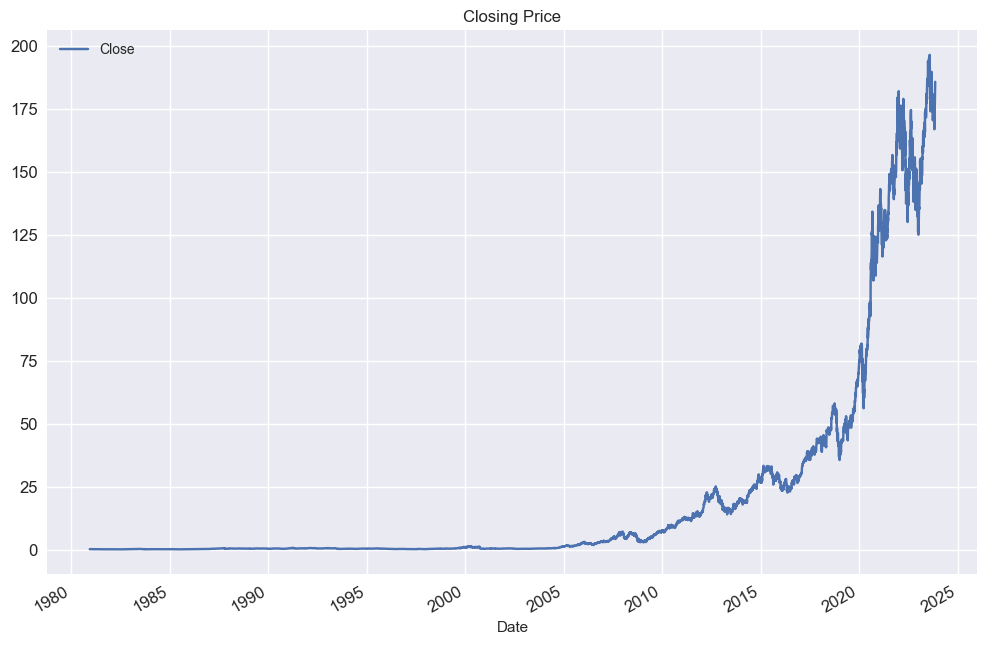

In [5]:
df.plot(figsize=(12,8),title="Closing Price",fontsize=12)
plt.show()

In [6]:
period_high=20
df["highest"]=(df["Close"].rolling(window=period_high).max()).shift()

C:\Users\Fadi\AppData\Local\Temp\ipykernel_20604\2939947759.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["highest"]=(df["Close"].rolling(window=period_high).max()).shift()


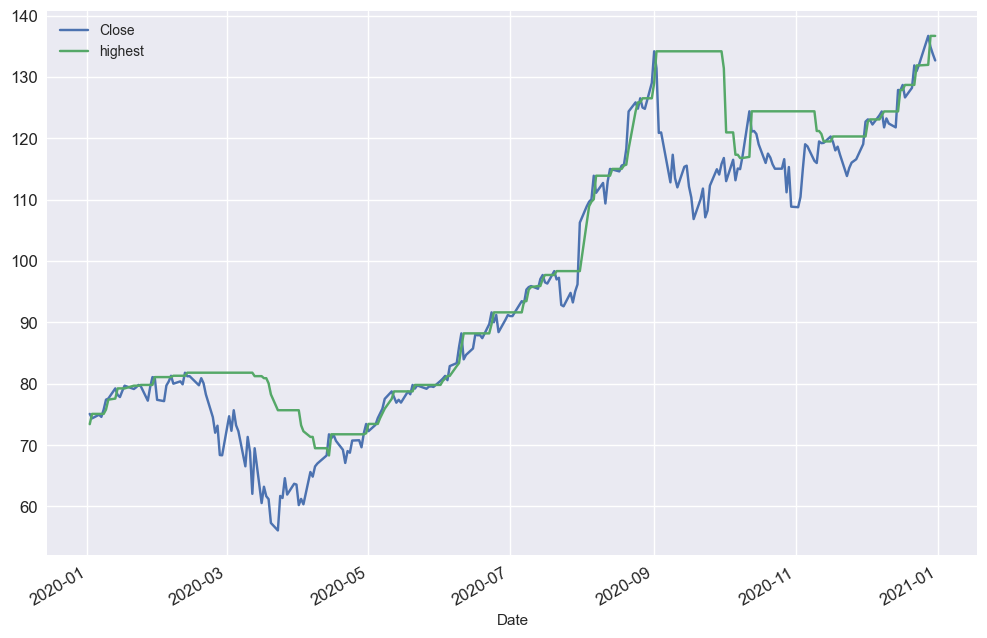

In [7]:
df.loc["2020"].plot(figsize=(12,8),fontsize=12)
plt.show()

In [8]:
df["Buy"]=np.where(df["Close"].shift()>df["highest"].shift(),1,0)

C:\Users\Fadi\AppData\Local\Temp\ipykernel_20604\1426304637.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Buy"]=np.where(df["Close"].shift()>df["highest"].shift(),1,0)


In [9]:
period_low=40
df["lowest"]=(df["Close"].rolling(window=period_low).min()).shift()

C:\Users\Fadi\AppData\Local\Temp\ipykernel_20604\2705081405.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["lowest"]=(df["Close"].rolling(window=period_low).min()).shift()


In [10]:
df["Sell"]=np.where(df["Close"].shift()<df["lowest"].shift(),1,0)

C:\Users\Fadi\AppData\Local\Temp\ipykernel_20604\298566414.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Sell"]=np.where(df["Close"].shift()<df["lowest"].shift(),1,0)


In [11]:
df

,Close,highest,Buy,lowest,Sell
Date,,,,,
1980-12-12,0.128348,NaN,0,NaN,0
1980-12-15,0.121652,NaN,0,NaN,0
1980-12-16,0.112723,NaN,0,NaN,0
1980-12-17,0.115513,NaN,0,NaN,0
1980-12-18,0.118862,NaN,0,NaN,0
...,...,...,...,...,...
2023-11-06,179.229996,180.710007,0,166.889999,0
2023-11-07,181.820007,180.710007,0,166.889999,0
2023-11-08,182.889999,181.820007,1,166.889999,0


In [12]:
df_trades=df[(df.Buy==1)|(df.Sell==1)]
df_trades

,Close,highest,Buy,lowest,Sell
Date,,,,,
1981-02-17,0.116629,0.146763,0,0.113839,1
1981-02-23,0.109933,0.146205,0,0.108259,1
1981-02-25,0.112723,0.142857,0,0.106027,1
1981-03-10,0.100446,0.121652,0,0.105469,1
1981-03-11,0.096540,0.121652,0,0.100446,1
...,...,...,...,...,...
2023-10-12,180.710007,179.800003,1,170.429993,0
2023-10-13,178.850006,180.710007,1,170.429993,0
2023-10-27,168.220001,180.710007,0,166.889999,1


In [13]:
trade=df_trades[(df_trades.Buy.diff()==1)|(df_trades.Sell.diff()==1)]
trade

,Close,highest,Buy,lowest,Sell
Date,,,,,
1981-03-24,0.118862,0.119420,1,0.096540,0
1981-07-01,0.114955,0.146763,0,0.116071,1
1981-10-13,0.085938,0.085938,1,0.063616,0
1982-03-08,0.073103,0.088170,0,0.074219,1
1982-07-21,0.063616,0.063616,1,0.049107,0
...,...,...,...,...,...
2023-09-05,189.699997,189.460007,1,174.000000,0
2023-09-22,174.789993,189.699997,0,173.929993,1
2023-10-12,180.710007,179.800003,1,170.429993,0


In [14]:
df

,Close,highest,Buy,lowest,Sell
Date,,,,,
1980-12-12,0.128348,NaN,0,NaN,0
1980-12-15,0.121652,NaN,0,NaN,0
1980-12-16,0.112723,NaN,0,NaN,0
1980-12-17,0.115513,NaN,0,NaN,0
1980-12-18,0.118862,NaN,0,NaN,0
...,...,...,...,...,...
2023-11-06,179.229996,180.710007,0,166.889999,0
2023-11-07,181.820007,180.710007,0,166.889999,0
2023-11-08,182.889999,181.820007,1,166.889999,0


In [15]:
Buy_dates=[]
Sell_dates=[]
buys=[]
sells=[]
open_pos=False

In [16]:
for i in range(len(df)):
    if df.Buy.iloc[i]:
        if open_pos==False:
            buys.append(i)
            open_pos=True
            Buy_dates.append(df.iloc[i].name)
    elif df.Sell.iloc[i]:
        if open_pos:
            sells.append(i)
            open_pos=False
            Sell_dates.append(df.iloc[i].name)
            

In [17]:
print(len(buys))
print(len(sells))

96
95


In [18]:
if len(buys)>len(sells):
    buys.pop(-1)
    Buy_dates.pop(-1)

In [19]:
print(len(buys))
print(len(sells))

95
95


In [20]:
check=pd.DataFrame({'buydate':Buy_dates,'selldate':Sell_dates,'buyprice':df.loc[Buy_dates].Close.values,'sellprice':df.loc[Sell_dates].Close.values})
check

,buydate,selldate,buyprice,sellprice
0,1981-03-24,1981-07-01,0.118862,0.114955
1,1981-10-13,1982-03-08,0.085938,0.073103
2,1982-07-21,1983-01-10,0.063616,0.128348
3,1983-01-17,1983-04-05,0.152344,0.180246
4,1983-04-15,1983-06-29,0.204241,0.219308
...,...,...,...,...
90,2022-07-15,2022-09-19,150.169998,154.479996
91,2022-10-26,2022-11-10,149.350006,146.869995
92,2023-01-23,2023-08-08,141.110001,179.800003
93,2023-09-05,2023-09-22,189.699997,174.789993


In [21]:
check["pnl_perc"]=(check.sellprice-check.buyprice)/check.buyprice
check

,buydate,selldate,buyprice,sellprice,pnl_perc
0,1981-03-24,1981-07-01,0.118862,0.114955,-0.032870
1,1981-10-13,1982-03-08,0.085938,0.073103,-0.149352
2,1982-07-21,1983-01-10,0.063616,0.128348,1.017543
3,1983-01-17,1983-04-05,0.152344,0.180246,0.183151
4,1983-04-15,1983-06-29,0.204241,0.219308,0.073771
...,...,...,...,...,...
90,2022-07-15,2022-09-19,150.169998,154.479996,0.028701
91,2022-10-26,2022-11-10,149.350006,146.869995,-0.016605
92,2023-01-23,2023-08-08,141.110001,179.800003,0.274183
93,2023-09-05,2023-09-22,189.699997,174.789993,-0.078598


In [22]:
check["cumm+pnl_perc"]=(check["pnl_perc"]+1).cumprod()
check

,buydate,selldate,buyprice,sellprice,pnl_perc,cumm+pnl_perc
0,1981-03-24,1981-07-01,0.118862,0.114955,-0.032870,0.967130
1,1981-10-13,1982-03-08,0.085938,0.073103,-0.149352,0.822687
2,1982-07-21,1983-01-10,0.063616,0.128348,1.017543,1.659807
3,1983-01-17,1983-04-05,0.152344,0.180246,0.183151,1.963802
4,1983-04-15,1983-06-29,0.204241,0.219308,0.073771,2.108674
...,...,...,...,...,...,...
90,2022-07-15,2022-09-19,150.169998,154.479996,0.028701,2010.860655
91,2022-10-26,2022-11-10,149.350006,146.869995,-0.016605,1977.469585
92,2023-01-23,2023-08-08,141.110001,179.800003,0.274183,2519.658676
93,2023-09-05,2023-09-22,189.699997,174.789993,-0.078598,2321.619031


In [23]:
totaltrades=len(check.pnl_perc)
totaltrades

95

In [24]:
profits=df.loc[check.selldate].Close.values-df.loc[check.buydate].Close.values
profits

array([-3.90700251e-03, -1.28349960e-02,  6.47319928e-02,  2.79019922e-02,
        1.50670111e-02, -3.12500000e-02, -1.17179975e-02,  8.92899930e-03,
       -8.92899930e-03,  1.11600012e-03, -2.00889930e-02, -1.17190033e-02,
       -1.67399645e-03, -1.11600012e-02, -1.72989964e-02,  7.47769922e-02,
        1.65179014e-01, -3.34799290e-03,  1.33929849e-02, -6.02679849e-02,
       -1.56250000e-02,  3.45990062e-02, -8.92901421e-03,  3.23660076e-02,
       -4.35270071e-02,  1.25000000e-01,  1.00445986e-01, -5.58040440e-02,
        5.80349863e-02, -2.23210156e-02, -7.92420208e-02, -3.34799290e-03,
        4.46400046e-03,  3.62719893e-02,  2.79000401e-03,  4.46501374e-03,
        3.79459858e-02, -6.13839924e-02, -3.57140005e-02,  2.23200023e-03,
       -1.17189884e-02,  1.06029958e-02,  1.71875015e-01, -5.41299880e-02,
        5.42967975e-01,  2.23210454e-02, -3.79469991e-02, -5.68917006e-01,
       -8.37049782e-02,  4.84820008e-02,  7.96430111e-02, -3.64280045e-02,
       -6.42898679e-03, -

In [25]:
i=0
profit_trades=len([i for i in profits if i>0])
profit_trades_perc=(profit_trades/totaltrades)*100

In [26]:
print("No of profit trades = {}".format(profit_trades))
print("Win ratio = {}". format(profit_trades_perc))

No of profit trades = 50
Win ratio = 52.63157894736842


In [27]:
profits_perc=(df.loc[check.selldate].Close.values-df.loc[check.buydate].Close.values)/df.loc[check.buydate].Close.values

In [28]:
avg_profit=profits_perc.mean()*100
avg_profit

14.02015255065217

In [29]:
list_profits=(profits_perc+1).cumprod()
list_profits

array([9.67129929e-01, 8.22687320e-01, 1.65980675e+00, 1.96380240e+00,
       2.10867358e+00, 1.70287974e+00, 1.49854676e+00, 1.63795335e+00,
       1.52095107e+00, 1.53496813e+00, 1.29882197e+00, 1.16379275e+00,
       1.14777834e+00, 1.02025502e+00, 8.05099909e-01, 1.67513501e+00,
       3.39680922e+00, 3.36435774e+00, 3.48523397e+00, 2.95056605e+00,
       2.81984493e+00, 3.11221043e+00, 3.04107066e+00, 3.35269942e+00,
       2.98745976e+00, 4.24533755e+00, 5.26421354e+00, 4.72262351e+00,
       5.38276620e+00, 5.14353651e+00, 4.28827871e+00, 4.23160912e+00,
       4.29620965e+00, 4.88410654e+00, 4.92620823e+00, 4.98937510e+00,
       5.54374339e+00, 4.58189511e+00, 3.89675657e+00, 3.94053750e+00,
       3.64708710e+00, 3.89457541e+00, 8.61713445e+00, 7.30493733e+00,
       1.96661264e+01, 2.01078059e+01, 1.92637620e+01, 8.32564239e+00,
       6.57165068e+00, 7.66123614e+00, 9.55847074e+00, 8.32513703e+00,
       8.11928242e+00, 8.02856863e+00, 9.36819651e+00, 2.99833418e+01,
      

In [30]:
net_returns_perc=(list_profits[-1]-1)*100
net_returns_perc

216015.73334401788

In [31]:
profits_perc.min()

-0.5678080737980564

In [32]:
profits_perc.max()

2.2005457836063194

In [33]:
init_inv=1000
inv_ret=init_inv*(profits_perc+1).cumprod()
inv_ret[-1]

2161157.3334401785

In [34]:
def test_strategy(stock, buy_days, sell_days,invest):
    data=yf.download(stock)
    df=data.Close.to_frame()
    df["highest"]=(df["Close"].rolling(window=buy_days).max()).shift()
    df["Buy"]=np.where(df["Close"].shift()>df["highest"].shift(),1,0)
    df["lowest"]=(df["Close"].rolling(window=sell_days).min()).shift()
    df["Sell"]=np.where(df["Close"].shift()<df["lowest"].shift(),1,0)
    
    Buy_dates=[]
    Sell_dates=[]
    buys=[]
    sells=[]
    open_pos=False
    
    for i in range(len(df)):
        if df.Buy.iloc[i]:
            if open_pos==False:
                buys.append(i)
                open_pos=True
                Buy_dates.append(df.iloc[i].name)
        elif df.Sell.iloc[i]:
            if open_pos:
                sells.append(i)
                open_pos=False
                Sell_dates.append(df.iloc[i].name)
    
    if len(buys)>len(sells):
        buys.pop(-1)
        Buy_dates.pop(-1)
    
    check=pd.DataFrame({'buydate':Buy_dates,'selldate':Sell_dates,'buyprice':df.loc[Buy_dates].Close.values,'sellprice':df.loc[Sell_dates].Close.values})
    check["pnl_perc"]=(check.sellprice-check.buyprice)/check.buyprice
    check["cumm+pnl_perc"]=(check["pnl_perc"]+1).cumprod()
    
    profits_perc=(df.loc[check.selldate].Close.values-df.loc[check.buydate].Close.values)/df.loc[check.buydate].Close.values
    list_profits=(profits_perc+1).cumprod()
    net_returns_perc=(list_profits[-1]-1).round(3)*100
    
    inv_ret=init_inv*(profits_perc+1).cumprod()
    return_inv=inv_ret[-1]
    
    large_loss=profits_perc.min().round(3)*100
    large_profit=profits_perc.max().round(3)*100   
    
    return print("Returns perc= {}%".format(net_returns_perc)), print("Invested return= {}".format(return_inv)), print("Largest Loss= {}%".format(large_loss)), print("Largest Profit= {}%".format(large_profit))

In [35]:
test_strategy("KO", 40, 40,1000)

[*********************100%%**********************]  1 of 1 completed
Returns perc= 672.5%
Invested return= 7725.4804610686315
Largest Loss= -14.6%
Largest Profit= 45.7%


(None, None, None, None)